In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('E:\\UM_Dearborn\\Classes\\Sem 2\\Pattern recog and NN\\HW\\Project\\Dataset\\Dataset\\CAN1_2m_Thin_uns1\\CAN1Aauns1_1.csv',header=None,squeeze=True).transpose()

In [3]:
file_paths = {
    '1' : 'E:\\UM_Dearborn\\Classes\\Sem 2\\Pattern recog and NN\\HW\\Project\\Dataset\\Dataset\\CAN1_2m_Thin_uns1',
    '2' : 'E:\\UM_Dearborn\\Classes\\Sem 2\\Pattern recog and NN\\HW\\Project\\Dataset\\Dataset\\CAN2_6m_Thin_uns1',
    '3' : 'E:\\UM_Dearborn\\Classes\\Sem 2\\Pattern recog and NN\\HW\\Project\\Dataset\\Dataset\\CAN3_10m_Thin_uns1',
    '4' : 'E:\\UM_Dearborn\\Classes\\Sem 2\\Pattern recog and NN\\HW\\Project\\Dataset\\Dataset\\CAN5_2m_Thick_uns1',
    '5' : 'E:\\UM_Dearborn\\Classes\\Sem 2\\Pattern recog and NN\\HW\\Project\\Dataset\\Dataset\\CAN6_6m_Thick_uns1',
    '6' : 'E:\\UM_Dearborn\\Classes\\Sem 2\\Pattern recog and NN\\HW\\Project\\Dataset\\Dataset\\CAN91_2m_Silver_uns1',
    '7' : 'E:\\UM_Dearborn\\Classes\\Sem 2\\Pattern recog and NN\\HW\\Project\\Dataset\\Dataset\\CAN92_6m_Silver_uns1',
    '8' : 'E:\\UM_Dearborn\\Classes\\Sem 2\\Pattern recog and NN\\HW\\Project\\Dataset\\Dataset\\CAN93_10m_Silver_uns1'
}

data = []
target = []
for can, path in file_paths.items():
    print(can, path)
    for file in os.listdir(path):
        d = pd.read_csv(path+'\\'+file,header=None).to_numpy().flatten()
        data.append(d)
        target.append(eval(can))

# print(data,target)

1 E:\UM_Dearborn\Classes\Sem 2\Pattern recog and NN\HW\Project\Dataset\Dataset\CAN1_2m_Thin_uns1
2 E:\UM_Dearborn\Classes\Sem 2\Pattern recog and NN\HW\Project\Dataset\Dataset\CAN2_6m_Thin_uns1
3 E:\UM_Dearborn\Classes\Sem 2\Pattern recog and NN\HW\Project\Dataset\Dataset\CAN3_10m_Thin_uns1
4 E:\UM_Dearborn\Classes\Sem 2\Pattern recog and NN\HW\Project\Dataset\Dataset\CAN5_2m_Thick_uns1
5 E:\UM_Dearborn\Classes\Sem 2\Pattern recog and NN\HW\Project\Dataset\Dataset\CAN6_6m_Thick_uns1
6 E:\UM_Dearborn\Classes\Sem 2\Pattern recog and NN\HW\Project\Dataset\Dataset\CAN91_2m_Silver_uns1
7 E:\UM_Dearborn\Classes\Sem 2\Pattern recog and NN\HW\Project\Dataset\Dataset\CAN92_6m_Silver_uns1
8 E:\UM_Dearborn\Classes\Sem 2\Pattern recog and NN\HW\Project\Dataset\Dataset\CAN93_10m_Silver_uns1


In [4]:
data = np.array(data)
target = np.array(target)

# plt.figure(figsize=(100,10))
# plt.plot(data[:2000])
# plt.plot(np.ones(2000)*2.9)

dominant = data > 2.9
recessive = data < 2.9

dominant = dominant*3.5
recessive = recessive*2.5
# plt.plot(dominant[:2000]+recessive[:2000])
# plt.plot(np.ones(200)*599,np.arange(2,4,0.01))
# plt.plot(np.ones(200)*599*2,np.arange(2,4,0.01))
# plt.plot(np.ones(200)*599*3,np.arange(2,4,0.01))

In [5]:
type(data) == np.ndarray
print(data.shape)

(240, 599)


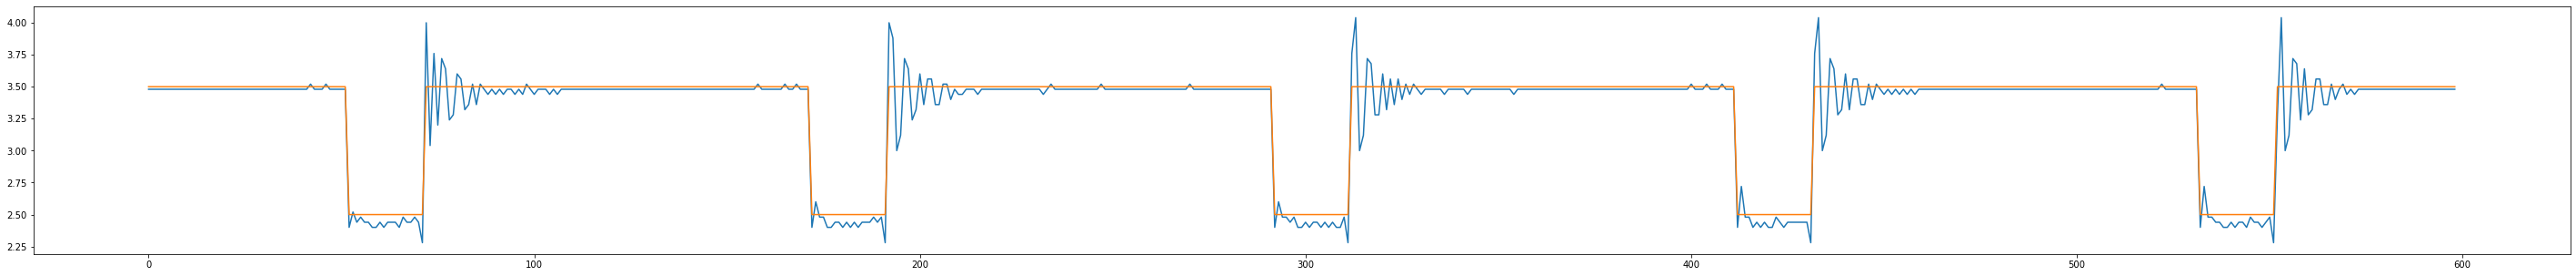

In [6]:
plt.figure(figsize=(50,5))
plt.plot(data[1])
plt.plot(dominant[1]+recessive[1])

In [43]:
def get_peaktime(data):
    
    peak_times = []
    peaks = []
#     settling_
    for sample in data:
        peak_time_in_sample = []
        peak_in_sample = []
        largest = 2.9
        counter = 0
        for reading in sample:
            if reading <2.9 and largest!=2.9:
                peak_time_in_sample.append(counter-1)
                peak_in_sample.append(largest)
                largest = 2.9
                counter = 0
            if reading > 2.9 and reading >largest:
                largest = reading
                counter += 1
        peak_times.append(peak_time_in_sample)
        peaks.append(peak_in_sample)
        
    return peak_times, peaks

In [44]:
peaks =  get_peaktime(data)[1]
x_peak = np.arange(0,len(peaks))
print(len(x_peak),peaks)
# plt.scatter(x_peak,peaks)

240 [list([3.48, 4.04, 4.04, 4.04, 4.04]) list([3.52, 4.0, 4.0, 4.04, 4.04])
 list([3.52, 3.96, 4.0, 3.96, 3.96]) list([3.96, 3.96, 3.96, 3.96])
 list([3.48, 4.0, 4.04, 4.04, 4.0]) list([3.56, 3.96, 4.0, 3.96, 3.96])
 list([3.52, 3.96, 4.0, 4.0, 4.0]) list([3.52, 4.0, 3.96, 3.96, 3.96])
 list([3.52, 4.0, 3.96, 3.96, 3.96]) list([3.52, 4.0, 4.04, 4.0, 4.04])
 list([4.0, 4.0, 3.96, 3.96, 3.96]) list([3.52, 4.0, 4.0, 4.0, 4.04])
 list([3.52, 4.0, 4.0, 4.0, 4.0]) list([3.52, 4.0, 4.0, 4.0, 4.0])
 list([3.52, 4.0, 4.0, 4.0, 3.96]) list([3.52, 4.0, 4.04, 4.0, 4.0])
 list([3.48, 4.0, 4.04, 4.04, 4.04]) list([3.76, 4.0, 4.04, 4.0, 4.0])
 list([4.0, 3.96, 3.96, 4.0, 4.0]) list([4.04, 3.96, 3.96, 3.96, 3.96])
 list([3.52, 4.0, 4.0, 4.0, 4.04]) list([4.04, 4.04, 4.04, 4.04, 4.04])
 list([3.48, 4.0, 4.0, 4.0, 3.96]) list([3.52, 4.04, 4.04, 4.04, 4.04])
 list([4.0, 4.0, 4.04, 4.04, 4.04]) list([3.48, 3.96, 4.0, 3.96, 4.0])
 list([3.96, 4.0, 4.0, 4.0]) list([3.52, 3.96, 4.0, 4.0, 4.0])
 list([3.68, 

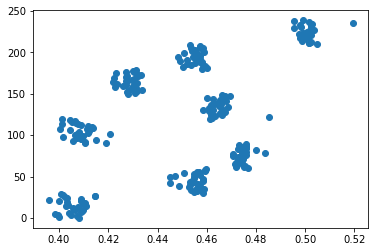

In [15]:
y_std=[np.std(data[i]) for i in range(len(data))]
X_std = np.arange(0,240)

plt.scatter(X_std,y_std)

# Neural Network

In [ ]:
class Neural_Network:
    def __init__(self, X, y, bias = 0):
        self.X = X
        self.y = y
        if type(X) == np.ndarray:
            self.weights = np.zeroes()